NADEA PUTRI NUR FAUZI

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-26 05:43:38--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.65MB/s    in 1m 54s  

2021-07-26 05:45:33 (2.69 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import tensorflow as tf                                                          
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile, os

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'                                         
zip_ref = zipfile.ZipFile(local_zip, 'r')                                        
zip_ref.extractall('/tmp')                                                       
zip_ref.close()                                                                  
 
train_dir = '/tmp/rockpaperscissors/rps-cv-images'
base_dir = '/tmp/rockpaperscissors/'

In [ ]:
os.listdir(base_dir)
os.listdir(train_dir)

['scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

In [ ]:
train_datagen = ImageDataGenerator(
      rescale = 1./255, 
      width_shift_range = 0.2,                                                    
      height_shift_range = 0.2,                                                                                                             
      shear_range = 0.1,                                                        
      zoom_range = 0.1,                                                           
      horizontal_flip=True,                                                      

      validation_split=0.4                                                       
      )

val_datagen = ImageDataGenerator(
      rescale = 1./255,                                                          
      width_shift_range = 0.2,                                                    
      height_shift_range = 0.2,                                                   
      shear_range = 0.1,                                                        
      zoom_range = 0.1,                                                           
      horizontal_flip=True,                                                      

      validation_split=0.4                                                       
      )

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    shuffle = True,
    subset = 'training'
)

val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    shuffle = True,
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([                                              
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),                                                    
    tf.keras.layers.Dense(128, activation='relu'),                                
    tf.keras.layers.Dense(512, activation='relu'),                               
    tf.keras.layers.Dense(3, activation='softmax')                                
])

model.summary()                                                                   

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 18496)            

In [ ]:
model.compile(loss='categorical_crossentropy',                                    
              optimizer=tf.optimizers.Adam(),                                     
              metrics=['accuracy'])                                               

In [ ]:
history=model.fit(
      train_generator,                                                            
      steps_per_epoch=16,                                                         
      epochs=20,                                                                                                                
      validation_data=val_generator,                                                      
      validation_steps=4,                                                         
      verbose=2)

Epoch 1/20
16/16 - 15s - loss: 1.1351 - accuracy: 0.3776 - val_loss: 1.0869 - val_accuracy: 0.3750
Epoch 2/20
16/16 - 14s - loss: 1.0524 - accuracy: 0.4689 - val_loss: 0.9538 - val_accuracy: 0.5625
Epoch 3/20
16/16 - 15s - loss: 0.8409 - accuracy: 0.6523 - val_loss: 0.6442 - val_accuracy: 0.7188
Epoch 4/20
16/16 - 14s - loss: 0.6761 - accuracy: 0.7116 - val_loss: 0.7465 - val_accuracy: 0.6562
Epoch 5/20
16/16 - 14s - loss: 0.5445 - accuracy: 0.7822 - val_loss: 0.5668 - val_accuracy: 0.7812
Epoch 6/20
16/16 - 14s - loss: 0.4047 - accuracy: 0.8506 - val_loss: 0.4597 - val_accuracy: 0.8359
Epoch 7/20
16/16 - 15s - loss: 0.4421 - accuracy: 0.8257 - val_loss: 0.4387 - val_accuracy: 0.8125
Epoch 8/20
16/16 - 14s - loss: 0.3577 - accuracy: 0.8610 - val_loss: 0.3197 - val_accuracy: 0.9219
Epoch 9/20
16/16 - 14s - loss: 0.4979 - accuracy: 0.8299 - val_loss: 0.7577 - val_accuracy: 0.7188
Epoch 10/20
16/16 - 15s - loss: 0.5634 - accuracy: 0.7871 - val_loss: 0.5083 - val_accuracy: 0.8047
Epoch 11/

melihat data hasil akurasi dan validasi

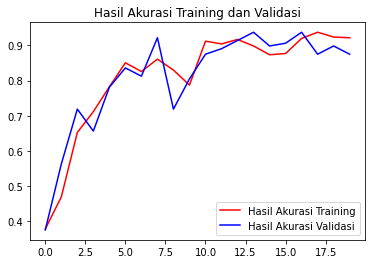

<Figure size 432x288 with 0 Axes>

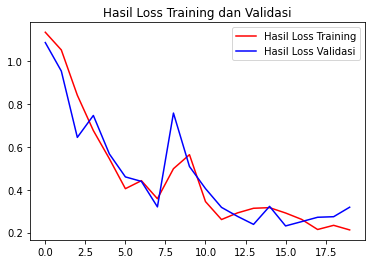

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Hasil Akurasi Training')
plt.plot(epochs, val_acc, 'b', label = 'Hasil Akurasi Validasi')
plt.title('Hasil Akurasi Training dan Validasi')
plt.legend(loc = 0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label = 'Hasil Loss Training')
plt.plot(epochs, val_loss, 'b', label = 'Hasil Loss Validasi')
plt.title('Hasil Loss Training dan Validasi')
plt.legend(loc = 0)
plt.figure()
plt.show()

In [ ]:
import numpy as np                                                                
from google.colab import files                                                    
from keras.preprocessing import image                                             
import matplotlib.pyplot as plt                                                   
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm (1).png
0bioBZYFCXqJIulm.png
Ini adalah Batu


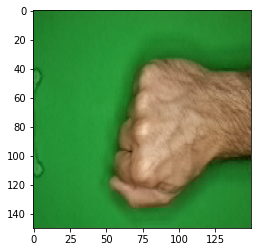

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn                                                                       
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Ini adalah Kertas')
  elif classes[0][1]==1:
    print('Ini adalah Batu')
  elif classes[0][2]==1:
    print('Ini adalah Gunting')
  else:
    print('Tidak diketahui')